# 가상 데이터 만들기

우선 선형회귀의 학습원리를 알아보기 위해 가상의 데이터를 생성시켜보겠다.

In [1]:
import numpy as np

* 입력값 X는 표준편차가 1인 정규분포로부터 무작위로 50개를 생성시켰다.
* y = 2*X-3의 관계식에 따라 데이터가 생성된다고 가정한다.
* 실제 상황에서 위의 관계식은 알려져있지 않으며, 데이터사이언스의 목적은 숨겨져있는 위와 같은 관계식을 우리가 확보한 데이터로부터 학습하는 것이다. 
* 하지만 현재는 이러한 관계식을 알고있다고 가정한다.

In [2]:

# 맞추어야 하는 정답
true_w = 2
true_b = -3
X = np.random.normal(1,size=50)

In [3]:
X

array([ 2.4085801 ,  1.66434523, -0.19699327,  1.95745135,  1.20661803,
        1.10369561,  2.3781342 ,  0.39470362,  1.68103236,  0.58270772,
       -0.40374379,  1.27380399,  0.09928011,  1.51715036,  0.59810466,
        0.96088542,  1.59028755,  2.31111471, -0.5576742 , -0.97574464,
       -0.62159024,  0.53022896,  2.39104426,  2.66750331,  0.33997897,
        3.14465573,  2.36416048,  2.05729291,  1.4308217 ,  1.55517148,
        2.0555417 ,  1.31570381, -0.59476259,  1.21021078,  3.00642358,
        0.03791732,  1.32833462,  0.91214535,  0.54190848,  1.07421343,
       -0.76714625,  1.50120589,  0.47793938,  1.64977984,  1.8913277 ,
        0.41831372,  2.12260319,  0.89896559, -0.09704756,  2.67689485])

In [4]:
y = true_w*X + true_b
y

array([ 1.81716020e+00,  3.28690461e-01, -3.39398655e+00,  9.14902708e-01,
       -5.86763944e-01, -7.92608782e-01,  1.75626841e+00, -2.21059276e+00,
        3.62064722e-01, -1.83458457e+00, -3.80748758e+00, -4.52392016e-01,
       -2.80143978e+00,  3.43007230e-02, -1.80379067e+00, -1.07822917e+00,
        1.80575106e-01,  1.62222942e+00, -4.11534840e+00, -4.95148927e+00,
       -4.24318049e+00, -1.93954209e+00,  1.78208852e+00,  2.33500662e+00,
       -2.32004206e+00,  3.28931146e+00,  1.72832095e+00,  1.11458582e+00,
       -1.38356591e-01,  1.10342960e-01,  1.11108340e+00, -3.68592387e-01,
       -4.18952518e+00, -5.79578443e-01,  3.01284717e+00, -2.92416537e+00,
       -3.43330752e-01, -1.17570930e+00, -1.91618303e+00, -8.51573144e-01,
       -4.53429251e+00,  2.41178194e-03, -2.04412124e+00,  2.99559689e-01,
        7.82655405e-01, -2.16337257e+00,  1.24520638e+00, -1.20206883e+00,
       -3.19409511e+00,  2.35378970e+00])

* 현재 상황에서 X와 y의 관계를 산점도로 그려보면 다음과 같은 그래프의 결과물이 출력되는 것을 확인할 수 있다. 
* X와 y의 관계식에 따라 직선 형태의 관계가 그려지는 것을 확인할 수 있다

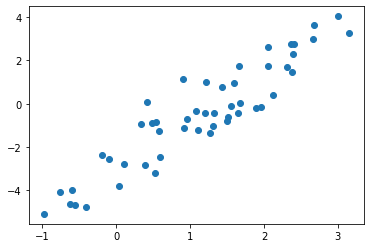

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

* y=2*X-3의 관계식에 추가적으로 일정부분의 noise를 추가한다. 
* noise : 관측과정에서 혹은 데이터 생성과정에서 우리가 컨트롤 할 수 없는 랜덤한 요소

In [11]:
noise = np.random.normal(0.1, size=50)
noise

array([ 9.53301547e-01,  2.75605863e-01, -2.65875066e-02,  3.07269871e-01,
        1.44926069e+00, -1.98925587e+00,  2.66209816e-01, -3.24422846e-01,
        1.00817921e+00,  8.49111756e-02,  9.12171229e-01, -7.70647784e-01,
       -7.99518600e-01, -4.76954783e-01,  1.22032106e+00, -7.89236281e-01,
        2.01579546e+00, -1.80130492e-01,  1.55602669e+00, -2.26597505e+00,
        4.72334499e-01, -2.84992830e-01, -9.46285445e-01,  1.27145274e+00,
       -1.28187279e+00, -1.76961784e+00,  1.01730055e+00, -2.19355138e-01,
        9.46638850e-01,  8.38849703e-01,  1.65658071e-03, -9.48601636e-02,
        1.56044707e-01,  1.57912918e+00,  9.29253009e-01,  3.67027450e-01,
       -3.23031658e-01,  9.67730982e-01,  1.27952390e-01,  5.09262577e-02,
       -2.88432556e-01, -1.22994182e+00, -1.37365122e+00, -6.65132979e-01,
       -1.19060635e-01,  1.64155595e+00, -1.95141554e+00, -3.97935984e-01,
       -1.25139959e+00,  7.41979426e-01])

* 이에따라 기존의 y에 랜덤 요소를 더하게 되면, 다음과 같은 X와 y사이의 관계를 얻을수 있다. 
* 실제 세계에서 우리는 다음과 같은 데이터를 확보할 수 있을 것이며, 우리의 목적은 주어진 데이터를 이용하여 정답 즉, y=2X-3의 관계식을 잘 추론할 수 있어야 할 것이다.

In [12]:
y = y + noise

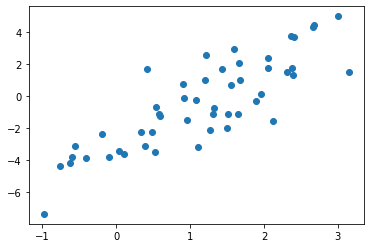

In [13]:
plt.scatter(X,y)

## 선형회귀 학습하기

* 파이썬에서 선형회귀 모형을 학습하기 위해서는 sklearn.linear_model안에 들어있는 LinearRegression을 사용하면 된다. 
* sklearn.linear_model 내부에는 LinearRegression과 LogisticRegression 등 선형모형에 관련된 다양한 모델들이 존재한다.


In [14]:
from sklearn.linear_model import LinearRegression

* 사용법은 매우 간단하다 LinearRegression 객체를 불러서 이를 사용하면 된다.
* 실제 사용하기 전에 sklearn에서 제공하는 LienarRegression API를 읽어보길 권장한다.
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(X,y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.4085801   1.66434523 -0.19699327  1.95745135  1.20661803  1.10369561
  2.3781342   0.39470362  1.68103236  0.58270772 -0.40374379  1.27380399
  0.09928011  1.51715036  0.59810466  0.96088542  1.59028755  2.31111471
 -0.5576742  -0.97574464 -0.62159024  0.53022896  2.39104426  2.66750331
  0.33997897  3.14465573  2.36416048  2.05729291  1.4308217   1.55517148
  2.0555417   1.31570381 -0.59476259  1.21021078  3.00642358  0.03791732
  1.32833462  0.91214535  0.54190848  1.07421343 -0.76714625  1.50120589
  0.47793938  1.64977984  1.8913277   0.41831372  2.12260319  0.89896559
 -0.09704756  2.67689485].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

* 현재 상황에서 reg.fit()명령어를 이용하여 학습하면 에러가 나는데 그 이유는 X벡터가 1차원 벡터로 주어져 있기 때문이다. (현재의 차원 1차원, n개의 벡터)
* 1차원인 종속변수와 달리 머신러닝 상황에서 대부분의 데이터는 matrix형태, 즉 2차원의 형태를 갖는다. 따라서 현재 독립변수가 1개의 feature로 구성되어 있다 하더라도 이를 2차원의 형태로 바꾸어주어야 한다. (즉 2차원, nxp 형태로 바꾸어주어야 한다)

In [19]:
X=X.reshape(-1,1)
X

array([[ 2.4085801 ],
       [ 1.66434523],
       [-0.19699327],
       [ 1.95745135],
       [ 1.20661803],
       [ 1.10369561],
       [ 2.3781342 ],
       [ 0.39470362],
       [ 1.68103236],
       [ 0.58270772],
       [-0.40374379],
       [ 1.27380399],
       [ 0.09928011],
       [ 1.51715036],
       [ 0.59810466],
       [ 0.96088542],
       [ 1.59028755],
       [ 2.31111471],
       [-0.5576742 ],
       [-0.97574464],
       [-0.62159024],
       [ 0.53022896],
       [ 2.39104426],
       [ 2.66750331],
       [ 0.33997897],
       [ 3.14465573],
       [ 2.36416048],
       [ 2.05729291],
       [ 1.4308217 ],
       [ 1.55517148],
       [ 2.0555417 ],
       [ 1.31570381],
       [-0.59476259],
       [ 1.21021078],
       [ 3.00642358],
       [ 0.03791732],
       [ 1.32833462],
       [ 0.91214535],
       [ 0.54190848],
       [ 1.07421343],
       [-0.76714625],
       [ 1.50120589],
       [ 0.47793938],
       [ 1.64977984],
       [ 1.8913277 ],
       [ 0

In [18]:
reg.fit(X,y)

LinearRegression()

* 학습이 완료되고 선형회귀 객체에 저장되어있는 학습된 패러미터를 확인해보자.

In [20]:
reg.coef_, reg.intercept_

(array([2.17033272]), -2.948694609225955)

* 우리가 생성시켰던 계수를 얼추 맞추는 것을 확인할수 있다. 데이터 생성시 발생한 랜덤한 요소로 인하여 완벽하게 데이터를 맞추지는 못하였음을 확인할 수 있다.

## 학습된 모형을 이용한 예측

In [21]:
y_pred = reg.predict(X)

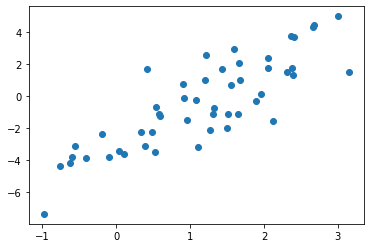

In [22]:
plt.scatter(X,y)

In [23]:
y_pred=reg.predict(X)
y_pred

array([ 2.27872559,  0.66348831, -3.37623556,  1.29962612, -0.32993202,
       -0.55330791,  2.21264787, -2.09205642,  0.69970493, -1.68402498,
       -3.82495297, -0.18411612, -2.73322374,  0.34402646, -1.65060849,
       -0.86325355,  0.5027585 ,  2.06719327, -4.15903317, -5.06638512,
       -4.29775225, -1.79792136,  2.24066698,  2.84067511, -2.21082712,
        3.87625463,  2.18232023,  1.51631551,  0.15666456,  0.42654494,
        1.51251481, -0.09317959, -4.23952732, -0.32213456,  3.57624487,
       -2.86640142, -0.06576651, -0.96903571, -1.77257289, -0.61729406,
       -4.61365723,  0.30942166, -1.91140713,  0.63187657,  1.15611579,
       -2.04081466,  1.65806055, -0.99764018, -3.1593201 ,  2.86105787])

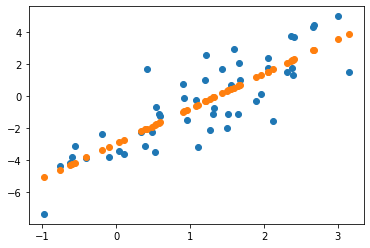

In [27]:
plt.scatter(X,y)
plt.scatter(X,y_pred)

## 새로운 데이터에 대한 예측

In [29]:
# -3부터 3까지 등간격으로 50개의 데이터 생성 
x2=np.linspace(-3,3,50)
x2

array([-3.        , -2.87755102, -2.75510204, -2.63265306, -2.51020408,
       -2.3877551 , -2.26530612, -2.14285714, -2.02040816, -1.89795918,
       -1.7755102 , -1.65306122, -1.53061224, -1.40816327, -1.28571429,
       -1.16326531, -1.04081633, -0.91836735, -0.79591837, -0.67346939,
       -0.55102041, -0.42857143, -0.30612245, -0.18367347, -0.06122449,
        0.06122449,  0.18367347,  0.30612245,  0.42857143,  0.55102041,
        0.67346939,  0.79591837,  0.91836735,  1.04081633,  1.16326531,
        1.28571429,  1.40816327,  1.53061224,  1.65306122,  1.7755102 ,
        1.89795918,  2.02040816,  2.14285714,  2.26530612,  2.3877551 ,
        2.51020408,  2.63265306,  2.75510204,  2.87755102,  3.        ])

In [30]:
y2_pred = reg.predict(x2.reshape(-1,1))

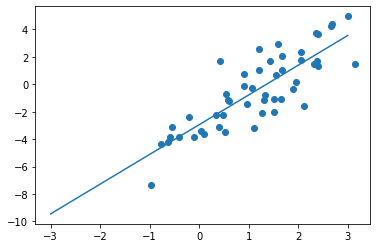

In [31]:
plt.scatter(X,y)
plt.plot(x2,y2_pred)